In [1]:
import pandas as pd

In [2]:
import numpy as np

In [81]:
import matplotlib.pyplot as plt

In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/

In [66]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [67]:
import nltk
import string

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [69]:
data = pd.read_csv('/Users/djbetts/Desktop/top-25-cigars/cigar_aficionado.csv', usecols=['name','tasting_notes'])

In [70]:
df = data.copy()

In [71]:
df.columns

Index(['name', 'tasting_notes'], dtype='object')

In [72]:
df.shape

(20769, 2)

In [73]:
df.dropna(axis=0, inplace=True)

In [74]:
df.head()

,name,tasting_notes
0,BOLIVAR ROYAL CORONA,"This is an earthy, rich cigar with a lovely br..."
1,DAVIDOFF GRAN CRU NO. 2,An enticing cigar that keeps you coming back f...
2,ASHTON CORONA,This cigar is well-made and gives plenty of fl...
3,ASHTON MAGNUM,"This is a clean, very mild well-made cigar, wi..."
4,ARTURO FUENTE CHATEAU FUENTE SUN GROWN,"Finely constructed, A. Fuente's robusto has a ..."


In [75]:
X = df.tasting_notes
corpus = list(X)

In [76]:
y = df.name

In [77]:
%%time
#create vectorizer

vectorizer = TfidfVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
#                 strip_accents='ascii', 
#                 lowercase=True, 
#                 preprocessor=functions.punc_strip, 
#                tokenizer=functions.wordnet_tokenize, 
#                 analyzer='word', 
#                stop_words=stop_words,
#                 token_pattern='(?u)\b\w\w+\b', 
                 ngram_range=(2, 2), 
#                  max_df=0.9, 
#                  min_df=0.1, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 8.46 ms, sys: 2.63 ms, total: 11.1 ms
Wall time: 11 ms


In [78]:
X = vectorizer.fit_transform(corpus)

In [83]:
%%time
distortions = []
K = range(1,20)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(X)
    distortions.append(kmeansModel.inertia_)

CPU times: user 19min 6s, sys: 52.3 s, total: 19min 59s
Wall time: 3min 35s


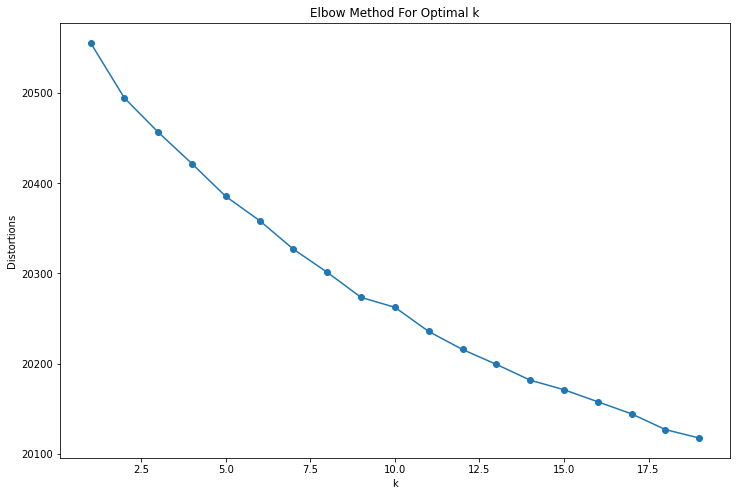

CPU times: user 762 ms, sys: 111 ms, total: 873 ms
Wall time: 184 ms


In [84]:
%%time
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title("Elbow Method For Optimal k")
plt.show()